In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import pandas as pd

In [2]:
from nltk.tag.stanford import StanfordPOSTagger

In [4]:

# https://www.kaggle.com/aashita/word-clouds-of-various-shapes/data
# def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
#     stopwords = set(STOPWORDS)
#     # more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
#     # stopwords = stopwords.union(more_stopwords)

#     wordcloud = WordCloud(background_color='white',
#                     stopwords = stopwords,
#                     max_words = max_words,
#                     max_font_size = max_font_size, 
#                     random_state = 42,
#                     mask = mask)
#     wordcloud.generate(text)
    
#     plt.figure(figsize=figure_size)
#     if image_color:
#         image_colors = ImageColorGenerator(mask);
#         plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
#         plt.title(title, fontdict={'size': title_size,  
#                                   'verticalalignment': 'bottom'})
#     else:
#         plt.imshow(wordcloud);
#         plt.title(title, fontdict={'size': title_size, 'color': 'green', 
#                                   'verticalalignment': 'bottom'})
#     plt.axis('off');
#     plt.tight_layout()  

In [5]:
with open('../data/raw_answers.csv') as f:
    lines = f.readlines()

In [6]:
file_names = []
answers = []
for line in lines[1:]:
    splits = line.split(',')
    file_names.append(splits[0].strip())
    answers.append('\n'.join(splits[1:]))

In [7]:
df = pd.DataFrame(data={"file_name":file_names,"answer":answers})

In [8]:
df['text'] = df['answer']
df['text'].to_csv('temp.csv', index=None)

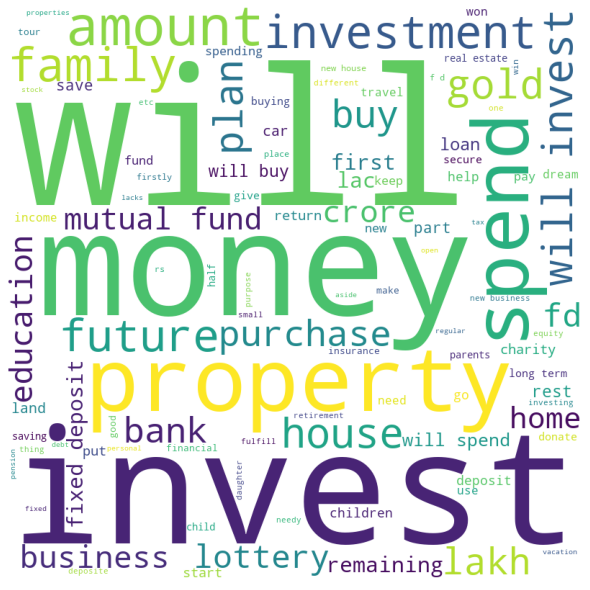

In [9]:
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.answer: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower().strip('.').strip(',').strip('"').strip('(').strip(')')
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

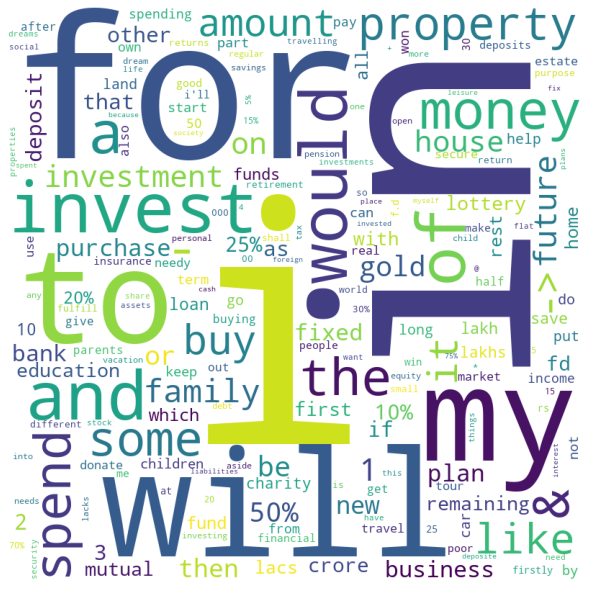

In [10]:
#.generate_from_frequencies()
import numpy as np
strings,counts = np.unique(comment_words.split(), return_counts=True)
frequencies = dict(zip(strings,counts))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [11]:
sorted_freq = sorted(frequencies.items(), key = lambda x: x[1], reverse=True)

In [12]:
sorted_freq[:20]

[('i', 321),
 ('in', 254),
 ('for', 237),
 ('will', 198),
 ('to', 154),
 ('my', 152),
 ('invest', 151),
 ('and', 143),
 ('of', 136),
 ('would', 133),
 ('a', 107),
 ('money', 90),
 ('the', 81),
 ('spend', 79),
 ('&', 75),
 ('-', 72),
 ('some', 71),
 ('property', 70),
 ('like', 59),
 ('buy', 55)]

In [13]:
from tqdm.auto import tqdm

100%|██████████| 321/321 [12:19<00:00,  2.30s/it]


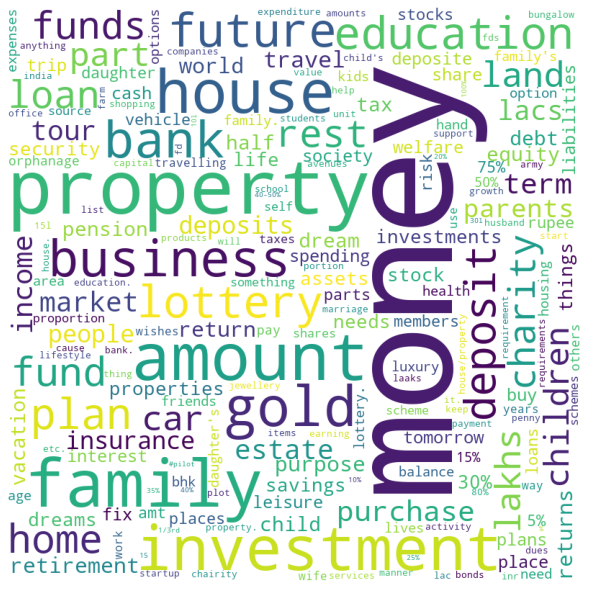

In [18]:
#.generate_from_frequencies()
import numpy as np
import nltk

jar = "./stanford_pos/stanford-postagger-4.2.0.jar"
model = "./stanford_pos/english-bidirectional-distsim.tagger"
 
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf-8")
 

tokens_pos=  []
for val in tqdm(df.answer): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    new_tokens = []
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower().strip('.').strip(',').strip('"').strip('(').strip(')').strip('<').strip('>')
        if tokens[i]!='':
            new_tokens.append(tokens[i])# Some might become empty
    
    token_pos = list(pos_tagger.tag(new_tokens))
    tokens_pos+= token_pos

tokensandpos = [text+'___'+pos for text,pos in tokens_pos ]
unique_tuples,counts = np.unique(tokensandpos, return_counts=True)
# counts_pos = list(zip(counts,pos_tags))
frequencies = dict(zip(unique_tuples,counts))
frequencies_2 = {k.split('___')[0]: v for k,v in frequencies.items() if k.split('___')[1] in ['NN','NNS','NNP','NNPS'] and k[0]!='~'} ## Check for all noun types, ignore crossed out words
# print(frequencies_2)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies_2)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

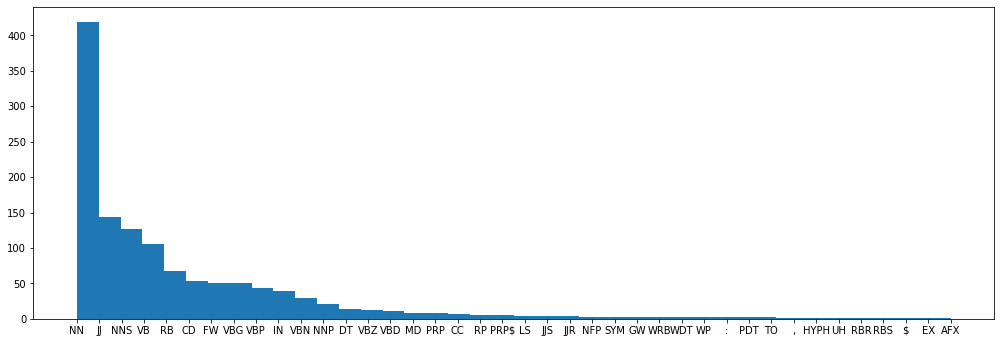

In [20]:
tag_fd = nltk.FreqDist(k.split('___')[1] for k in unique_tuples)
most_common = tag_fd.most_common()
val, weight = zip(*most_common)
plt.hist(val, weights=weight, bins = 40)
plt.tight_layout()
plt.gcf().set_size_inches(15,5)
plt.show()

In [21]:
tag_to_terms = {}
for unique_tuple, count in frequencies.items():
    term,tag = unique_tuple.split('___')
    if tag not in tag_to_terms:
        tag_to_terms[tag] = [(term, count)]
    else:
        tag_to_terms[tag].append((term,count))

for tag in tag_to_terms.keys():
    print(tag)
    sorted_unique_terms = sorted(tag_to_terms[tag], key = lambda x: x[1], reverse=True)
    print(sorted_unique_terms[:10])

NN
[('money', 90), ('property', 70), ('amount', 51), ('family', 51), ('investment', 44), ('house', 42), ('gold', 36), ('bank', 29), ('business', 29), ('50%', 25)]
CC
[('and', 143), ('&', 75), ('or', 35), ('either', 3), ('but', 2), ('ans', 1), ('for', 1)]
NFP
[('*', 6), ('-', 2), (':-', 1)]
SYM
[('+', 6), ('*', 1), ('-', 1)]
,
[('-', 19)]
:
[('-', 48), (':', 1)]
GW
[('-', 1), ('10%', 1), ('100%', 1)]
HYPH
[('-', 55)]
CD
[('1', 48), ('2', 28), ('3', 26), ('crore', 24), ('10', 18), ('50', 13), ('30', 10), ('25', 9), ('000', 8), ('00', 8)]
LS
[('1.', 1), ('1', 1), ('2.', 1), ('ii', 1)]
FW
[('in', 15), ('50%', 6), ('fd', 6), ('10%', 4), ('i.e', 4), ('i', 4), ('20%', 3), ('25%', 3), ('f.d', 3), ('etc.', 2)]
NNS
[('funds', 17), ('lakhs', 15), ('children', 14), ('lacs', 12), ('parents', 11), ('deposits', 10), ('people', 10), ('returns', 8), ('assets', 6), ('dreams', 6)]
NNP
[("i'll", 5), ('fd', 2), ('10l', 1), ('15', 1), ('25%', 1), ('30l', 1), ('60%', 1), ('ahmedabad', 1), ('amoutn', 1), ('bm

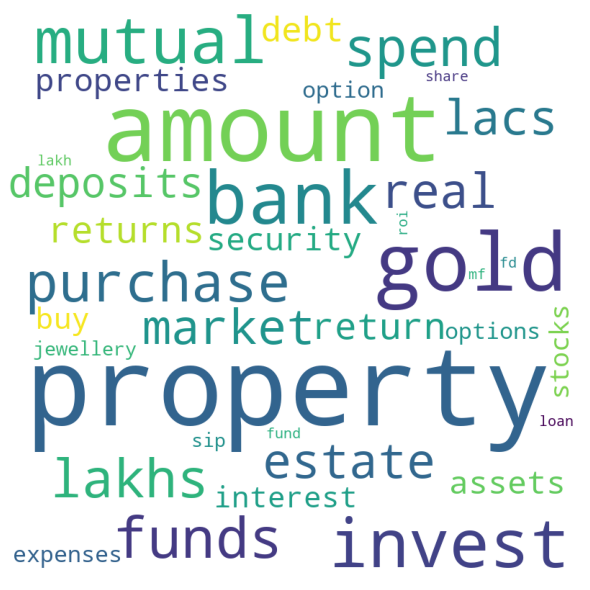

In [22]:
financial_terms = ['buy', 'sell', 'debt', 'funds', 'invest', 'stocks', 'share', 'gold', 'property', 'real','estate','coin','jewellery','fund','mutual','mf','fd','market','sip','roi','amount','loan','lacs','lakh','lakhs','debts','deposits','properties','assets','options','option','expenses','security','interest','mutual','purchase','return','returns','bank','spend']
frequencies_3 = {k.split('___')[0]: v for k,v in frequencies.items() if k.split('___')[0] in financial_terms and k[0]!='~'} ## Check for all noun types, ignore 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(frequencies_3)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [222]:
df = pd.read_csv('../data/text_label_data.csv')

In [223]:
df.shape

(321, 31)

In [225]:
df = df[~(df['label']=='FALSE')]

In [226]:
df.shape

(310, 31)

In [227]:
df.isna().sum()

Image File                              0
text                                    2
Part 1                                  0
Gender                                  0
Age                                    12
Marital Status                          6
Religion                               65
Residing in Guajart since               8
Level of Education                     10
Number of Dependent Family Members     17
Number of Earning Family Members       17
Occupation                              2
Do you have steady source of income    11
Annual Income                          14
Do you own any immovable assets         6
Bank deposits                           0
Gold (Coins & Jewelry)                  1
Property                                0
Insurance                               1
Pension and Provident Funds             0
Mutual Funds                            0
Any other (Specify)                     0
Education Loan                          0
Housing Loan                      

In [228]:
df.dropna(subset=['text'],inplace=True)

In [229]:
columns = list(df.columns)
columns.remove('Part 1')

In [230]:
df.groupby('label')[columns].mean()

,Gender,Age,Marital Status,Religion,Residing in Guajart since,Level of Education,Number of Dependent Family Members,Number of Earning Family Members,Occupation,Do you have steady source of income,...,Pension and Provident Funds,Mutual Funds,Any other (Specify),Education Loan,Housing Loan,Personal Loan,Vehicle Loan,Gold Loan,Other interest payable loans,None
label,,,,,,,,,,,,,,,,,,,,,
0,1.549020,33.300000,1.720000,1.172414,26.827723,2.715686,2.448980,1.989796,1.960784,0.693878,...,2.823529,3.000000,1.009804,0.049020,0.274510,0.098039,0.147059,0.019608,0.049020,0.490196
1,1.627119,34.070175,1.686957,1.056818,28.500000,2.649123,2.553571,1.857143,2.051724,0.660870,...,2.847458,2.822034,1.084746,0.033898,0.279661,0.110169,0.169492,0.033898,0.084746,0.449153
2,1.647727,35.146341,1.689655,1.117647,28.485542,2.621951,2.333333,1.925926,2.000000,0.714286,...,2.693182,3.250000,1.272727,0.068182,0.352273,0.193182,0.193182,0.022727,0.068182,0.386364


In [231]:
df.shape

(308, 31)

# Demographs vs Risk

## Gender

In [232]:
df = df[columns]

In [233]:
np.unique(df['Gender'])

array([1, 2])

In [234]:
df['Gender'].isna().sum()

0

In [235]:
grouped_by_gender = df.groupby('label')['Gender'].apply(list).reset_index(name='values')

grouped_by_gender

,label,values
0,0,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, ..."
1,1,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, ..."
2,2,"[2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, ..."


In [236]:
grouped_by_gender.values.shape

(3, 2)

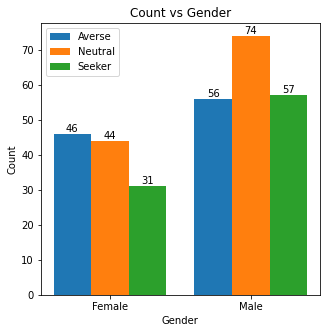

In [237]:
fig, ax = plt.subplots()
freq, bins, patches = ax.hist(grouped_by_gender['values'].values, bins=2, label=['Averse','Neutral','Seeker'])
plt.xlabel('Gender')
labels = ax.get_xticklabels()
ax.set_xticks([1.1833333333333333+0.1333333333333333/2,1.6833333333333333+0.1333333333333333/2])
ax.set_xticklabels(['Female','Male'])
plt.ylabel('Count')
plt.title("Count vs Gender")
bin_centers = np.diff(bins)*0.5 + bins[:-1]

# num_patches = len(freq) # 3
# num_bins = len(bins) # 2

for patch in patches:
    for container in patch:
        x = container.xy[0]
        height = container.get_height()
        width = container.get_width()
        plt.annotate("{}".format(int(height)),
                    xy = (x+width/2, height),             # top left corner of the histogram bar
                    xytext = (0,0.5),             # offsetting label position above its bar
                    textcoords = "offset points", # Offset (in points) from the *xy* value
                    ha = 'center', va = 'bottom'
                    )
plt.legend()
fig.set_size_inches(5,5)
plt.show()

## Age

In [238]:
df['Age '].isna().sum()

12

In [239]:
import seaborn as sns

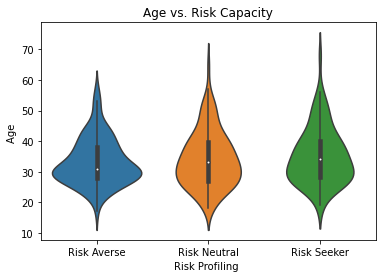

In [240]:
ax = sns.violinplot(x="Risk Profiling ",y="Age ", data= df, order=['Risk Averse', 'Risk Neutral','Risk Seeker'])
plt.title("Age vs. Risk Capacity")
plt.show()

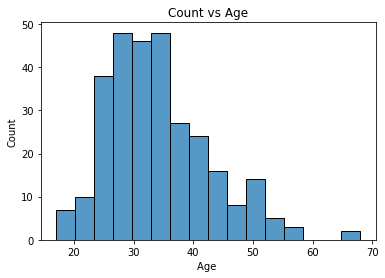

In [241]:
sns.histplot(df['Age '])
plt.title("Count vs Age")
plt.show()

## Marital Status

In [242]:
df['Marital Status'].isna().sum()

6

In [243]:
np.unique(df['Marital Status'].values)

array([ 1.,  2.,  3., nan, nan, nan, nan, nan, nan])

In [244]:
grouped_by_marital = df.groupby('label')['Marital Status'].apply(list).reset_index(name='values')

grouped_by_marital

,label,values
0,0,"[1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, ..."
1,1,"[1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ..."
2,2,"[1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, ..."


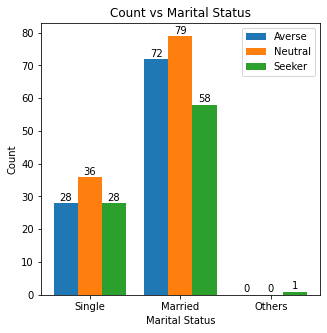

In [250]:
fig, ax = plt.subplots()
width = 0.1777777777777778
freq, bins, patches = ax.hist(grouped_by_marital['values'].values, bins=3, label=['Averse','Neutral','Seeker'])
plt.xlabel('Marital Status')
labels = ax.get_xticklabels()
ax.set_xticks([1.2444444444444445+width/2,1.911111111111111+width/2, 2.5777777777777775+width/2])
ax.set_xticklabels(['Single','Married','Others'])
plt.ylabel('Count')
plt.title("Count vs Marital Status")

# num_patches = len(freq) # 3
# num_bins = len(bins) # 2

for patch_idx, patch in enumerate(patches):
    for container_idx,container in enumerate(patch):
        x = container.xy[0]
        height = container.get_height()
        width = container.get_width()
        plt.annotate("{}".format(int(height)),
                    xy = (x+width/2, height),             # top left corner of the histogram bar
                    xytext = (0,0.5),             # offsetting label position above its bar
                    textcoords = "offset points", # Offset (in points) from the *xy* value
                    ha = 'center', va = 'bottom'
                    )
plt.legend()
fig.set_size_inches(5,5)
plt.show()

## Religion

In [246]:
df['Religion'].isna().sum()

65

In [247]:
np.unique(df['Religion'])

array([ 1.,  2.,  3.,  4.,  5., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [248]:
df['Religion'].fillna(6, inplace=True)

In [249]:
np.unique(df['Religion'].values)

array([1., 2., 3., 4., 5., 6.])

In [251]:
grouped_by_religion = df.groupby('label')['Religion'].apply(list).reset_index(name='values')

grouped_by_religion

,label,values
0,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0, 5.0, 1.0, ..."
1,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,2,"[1.0, 6.0, 6.0, 3.0, 1.0, 6.0, 1.0, 1.0, 6.0, ..."


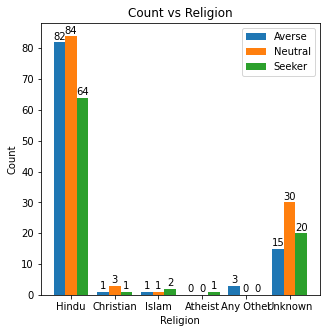

In [259]:
fig, ax = plt.subplots()
freq, bins, patches = ax.hist(grouped_by_religion['values'].values, bins=6, label=['Averse','Neutral','Seeker'])
plt.xlabel('Religion')
labels = ax.get_xticklabels()
ax.set_xticks([1.4166666666666667, 2.25, 3.0833333333333335, 3.916666666666667, 4.75, 5.583333333333334])
ax.set_xticklabels(['Hindu','Christian','Islam','Atheist', 'Any Other','Unknown'])
plt.ylabel('Count')
plt.title("Count vs Religion")

# num_patches = len(freq) # 3
# num_bins = len(bins) # 2

l = []
for patch_idx, patch in enumerate(patches):
    for container_idx,container in enumerate(patch):
        x = container.xy[0]
        height = container.get_height()
        width = container.get_width()
        if patch_idx ==1:
            l.append(x+width/2)
        plt.annotate("{}".format(int(height)),
                    xy = (x+width/2, height),             # top left corner of the histogram bar
                    xytext = (0,0.5),             # offsetting label position above its bar
                    textcoords = "offset points", # Offset (in points) from the *xy* value
                    ha = 'center', va = 'bottom'
                    )
plt.legend()
fig.set_size_inches(5,5)
plt.show()

## Income

In [261]:
df['Annual Income'].isna().sum()

14

In [264]:
np.unique(df['Annual Income'])

array([ 1.,  2.,  3.,  4., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [265]:
df['Annual Income'].fillna(5, inplace=True)

In [267]:
grouped_by_income = df.groupby('label')['Annual Income'].apply(list).reset_index(name='values')

grouped_by_income

,label,values
0,0,"[1.0, 5.0, 2.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, ..."
1,1,"[1.0, 3.0, 3.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, ..."
2,2,"[3.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 2.0, 3.0, ..."


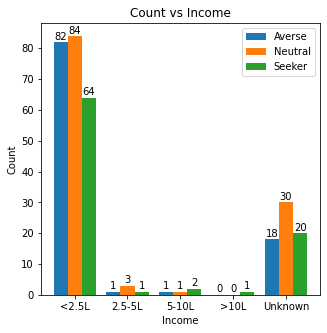

In [271]:
fig, ax = plt.subplots()
freq, bins, patches = ax.hist(grouped_by_religion['values'].values, bins=5, label=['Averse','Neutral','Seeker'])
plt.xlabel('Income')
labels = ax.get_xticklabels()
ax.set_xticks([1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_xticklabels(['<2.5L','2.5-5L','5-10L','>10L','Unknown'])
plt.ylabel('Count')
plt.title("Count vs Income")

# num_patches = len(freq) # 3
# num_bins = len(bins) # 2

l = []
for patch_idx, patch in enumerate(patches):
    for container_idx,container in enumerate(patch):
        x = container.xy[0]
        height = container.get_height()
        width = container.get_width()
        if patch_idx ==1:
            l.append(x+width/2)
        plt.annotate("{}".format(int(height)),
                    xy = (x+width/2, height),             # top left corner of the histogram bar
                    xytext = (0,0.5),             # offsetting label position above its bar
                    textcoords = "offset points", # Offset (in points) from the *xy* value
                    ha = 'center', va = 'bottom'
        )                   
plt.legend()
fig.set_size_inches(5,5)
plt.show()

# Radar Charts for MCQ

## Age vs Investment

In [278]:
ages = [0,20,40,60,80,100]
age_groups = list(zip(ages[:-1],ages[1:]))
age_groups

[(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]

In [288]:
def find_age_group(age):
    for group in age_groups:
        if age>=group[0] and age<group[1]:
            return str(group[0])+"-"+str(group[1])
    else:
        return 'Unknown'

In [289]:
df['Age Group'] = df['Age '].apply(find_age_group)

In [291]:
df[['Age ','Age Group']][df['Age '].isna()]

,Age,Age Group
32,NaN,Unknown
44,NaN,Unknown
65,NaN,Unknown
84,NaN,Unknown
85,NaN,Unknown
90,NaN,Unknown
158,NaN,Unknown
179,NaN,Unknown
204,NaN,Unknown
221,NaN,Unknown


In [292]:
np.unique(df['Age Group'])

array(['0-20', '20-40', '40-60', '60-80', 'Unknown'], dtype=object)

In [294]:
df.columns

Index(['Image File ', 'text', 'Gender', 'Age ', 'Marital Status', 'Religion',
       'Residing in Guajart since', 'Level of Education',
       'Number of Dependent Family Members',
       'Number of Earning Family Members', 'Occupation',
       'Do you have steady source of income', 'Annual Income',
       'Do you own any immovable assets', 'Bank deposits',
       'Gold (Coins & Jewelry)', 'Property ', 'Insurance ',
       'Pension and Provident Funds', 'Mutual Funds', 'Any other (Specify)',
       'Education Loan', 'Housing Loan', 'Personal Loan', 'Vehicle Loan',
       'Gold Loan', 'Other interest payable loans', 'None', 'Risk Profiling ',
       'label', 'Age Group'],
      dtype='object')

In [348]:
np.unique(df[mcq_columns], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5., nan, nan]),
 array([366, 328, 289, 384, 396, 391,   1,   1]))

In [350]:
df[mcq_columns] = df[mcq_columns].fillna(0.0)

In [351]:
np.unique(df[mcq_columns], return_counts=True)

(array([0., 1., 2., 3., 4., 5.]), array([368, 328, 289, 384, 396, 391]))

In [365]:
num_to_perc_map = {
    5.0:100,
    4.0:75,
    3.0:50,
    2.0:25,
    1.0:10,
    0.0: 0,
}
for column in mcq_columns:
    df[column] = df[column].apply(lambda x: num_to_perc_map[x])

In [366]:
mcq_columns = ['Bank deposits',
       'Gold (Coins & Jewelry)', 'Property ', 'Insurance ',
       'Pension and Provident Funds', 'Mutual Funds', 'Any other (Specify)']

In [367]:
len(mcq_columns)

7

In [368]:
group_mcq_by_age = df.groupby('Age Group')[mcq_columns].mean().reset_index()

In [369]:
group_mcq_by_age.columns

Index(['Age Group', 'Bank deposits', 'Gold (Coins & Jewelry)', 'Property ',
       'Insurance ', 'Pension and Provident Funds', 'Mutual Funds',
       'Any other (Specify)'],
      dtype='object')

https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals

In [370]:
categories=list(group_mcq_by_age)[1:]
N = len(categories)
N

7

In [371]:
from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

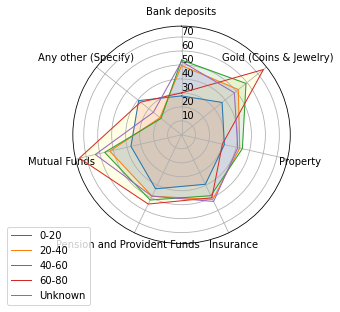

In [372]:
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)

colors = ['red','blue','green','yellow','pink']
for i,group in enumerate(group_mcq_by_age['Age Group']):

    # Ind1
    values=group_mcq_by_age[group_mcq_by_age['Age Group']==group].drop('Age Group',axis=1).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
    ax.fill(angles, values, c = colors[i], alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

## Gender

In [373]:
np.unique(df['Gender'])

array([1, 2])

In [375]:
df['Gender'] = df['Gender'].apply(lambda x: "Female" if x==1 else "Male")

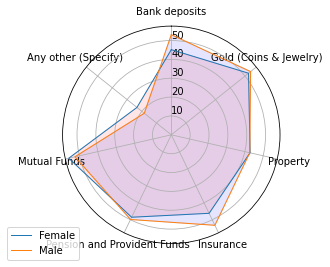

In [386]:
group_mcq_by_gender = df.groupby('Gender')[mcq_columns].mean().reset_index()
categories=list(group_mcq_by_gender)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)

colors = ['red','blue']
for i,group in enumerate(group_mcq_by_gender['Gender']):

    # Ind1
    values=group_mcq_by_gender[group_mcq_by_gender['Gender']==group].drop('Gender',axis=1).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
    ax.fill(angles, values, c = colors[i], alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


## Income Groups

In [391]:
np.unique(df['Annual Income'])

array([1., 2., 3., 4., 5.])

In [392]:
num_to_income = dict(zip(list(range(1,6)),['<2.5L','2.5-5L','5-10L','>10L','Unknown']))
df['Income Group'] = df['Annual Income'].apply(num_to_income.get)

In [393]:
np.unique(df['Income Group'].values, return_counts=True)

(array(['2.5-5L', '5-10L', '<2.5L', '>10L', 'Unknown'], dtype=object),
 array([119,  96,  35,  44,  14]))

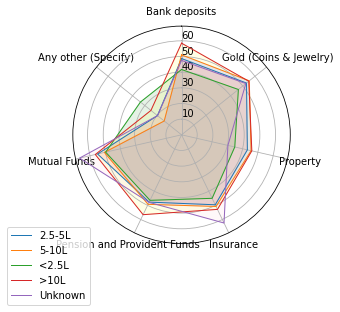

In [394]:
group_mcq_by_income = df.groupby('Income Group')[mcq_columns].mean().reset_index()
categories=list(group_mcq_by_income)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)

colors = ['red','blue','green','yellow','pink']
for i,group in enumerate(group_mcq_by_income['Income Group']):

    # Ind1
    values=group_mcq_by_income[group_mcq_by_income['Income Group']==group].drop('Income Group',axis=1).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
    ax.fill(angles, values, c = colors[i], alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


## Risk Capacity

In [398]:
np.unique(df['Risk Profiling '])

array(['Risk Averse', 'Risk Neutral', 'Risk Seeker'], dtype=object)

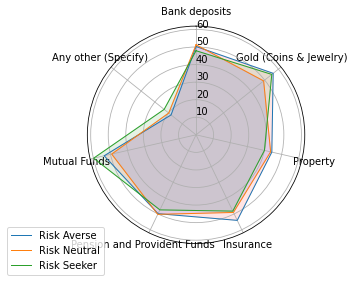

In [400]:
group_mcq_by_risk = df.groupby('Risk Profiling ')[mcq_columns].mean().reset_index()
categories=list(group_mcq_by_risk)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)

colors = ['red','blue','green']
for i,group in enumerate(group_mcq_by_risk['Risk Profiling ']):

    # Ind1
    values=group_mcq_by_risk[group_mcq_by_risk['Risk Profiling ']==group].drop('Risk Profiling ',axis=1).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
    ax.fill(angles, values, c = colors[i], alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


# Embeddings

In [401]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification

## Before Fine-Tuning

### BERT-Base

#### Embeddings

In [402]:
from src.datasets import FinText
from torch.utils.data import DataLoader
from transformers import BertModel, BertTokenizerFast
import torch
from tqdm.auto import tqdm

In [403]:
data = FinText('temp.csv')
loader = DataLoader(data, batch_size=1,collate_fn = data.custom_collate_fn)

In [404]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [6]:
word_embeddings = {}
# Can use offset mapping to get the actual word in the data if needed.
with torch.no_grad():
    model.eval()
    for batch in tqdm(loader):
        sequence_output, *_ = model(**batch, return_dict=False)
        embeddings = sequence_output[0]
        tokens = tokenizer.convert_ids_to_tokens(batch['input_ids'][0]) #first sample
        current_token = ""
        embedding = None
        continuous_token_count = 0
        for token_idx, token in enumerate(tokens):
            if token in ["[CLS]","[PAD]","[SEP]"]:
                if token not in word_embeddings:
                    word_embeddings[token] = [embeddings[token_idx].numpy()] #first sample with this word
                else:
                    word_embeddings[token]+=[embeddings[token_idx].numpy()]
        
            elif token.startswith("##"): #subsequent tokens
                current_token+=token[2:] 
                continuous_token_count+=1
                embedding+=embeddings[token_idx].numpy()

            else:
                if tokens[token_idx-1]=="[CLS]": # First one
                    current_token=token
                    continuous_token_count = 1
                    embedding = embeddings[token_idx].numpy()
                else:
                    if current_token not in word_embeddings:
                        word_embeddings[current_token] = [embedding] # first sample with this word
                    else:
                        word_embeddings[current_token]+=[embedding]
                    current_token=token
                    continuous_token_count = 1
                    embedding = embeddings[token_idx].numpy()

100%|██████████| 321/321 [00:44<00:00,  7.23it/s]


In [7]:
import numpy as np

In [8]:
for key in tqdm(word_embeddings):
    word_embeddings[key] = np.mean(word_embeddings[key],axis=0)

100%|██████████| 970/970 [00:00<00:00, 7994.19it/s]


In [15]:
# # Sanity
# for key in word_embeddings:
#     if word_embeddings[key].shape!=(768,):
#         print(key)

In [32]:
for word in STOPWORDS:
    if word in word_embeddings:
        del word_embeddings[word]

In [34]:
from sklearn.decomposition import PCA
pca = PCA(2)
repres = pca.fit_transform(list(word_embeddings.values()))

In [35]:
import matplotlib.pyplot as plt

In [36]:
from wordcloud import STOPWORDS

In [37]:
repres_x = []
repres_y = []
words = []
for idx,key in enumerate(word_embeddings.keys()):
    if key in financial_terms:
        repres_x.append(repres[idx][0])
        repres_y.append(repres[idx][1])
        words.append(key)

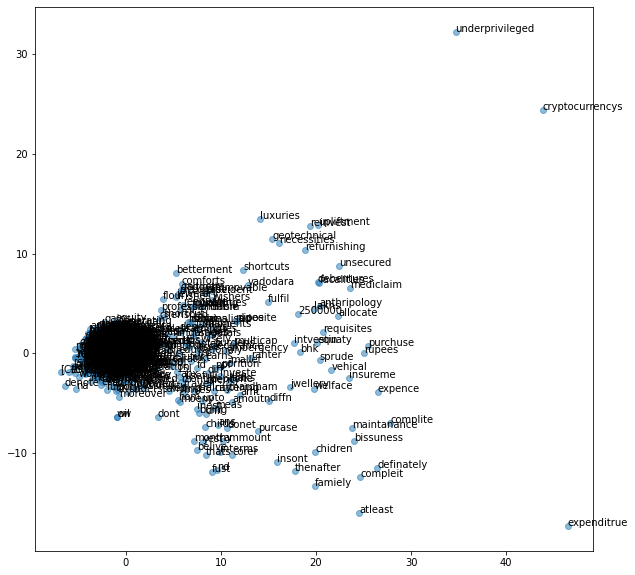

In [39]:
type = 'PCA'
fig = plt.figure(figsize=(10, 10)) 
financial_terms = ['buy', 'sell', 'debt', 'funds', 'invest', 'stocks', 'share', 'gold', 'property', 'real','estate','coin','jewellery','fund','mutual','mf','fd','market','sip','roi','amount','loan','lacs','lakh','lakhs','debts','deposits','properties','assets','options','option','expenses','security','interest','mutual','purchase','return','returns','bank','spend']

sc = plt.scatter(repres[:,0], repres[:,1], alpha=0.5, cmap='Spectral')
ax = plt.gca()
for i, txt in enumerate(word_embeddings.keys()):
    ax.annotate(txt, (repres[i,0], repres[i,1]))
# cbar = plt.colorbar(sc, ticks=sorted_unique_cs + 1/12, label='Years')
# cbar.ax.set_yticklabels(sorted_unique_years)
# cbar.ax.axes.tick_params(length=0)
plt.savefig(f'{type} Plot.png', bbox_inches='tight')
plt.show()
plt.close()